<a href="https://colab.research.google.com/github/joyb05/Market-Basket-Analysis/blob/main/Market_Basket_Analysis_Groceries_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd. set_option("display.max_colwidth", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Groceries_dataset.csv")

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.shape

(38765, 3)

In [ ]:
df['Date']=pd.to_datetime(df.Date)

In [ ]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)

In [ ]:
df['date_name'] = df['Date'].dt.day_name()

In [ ]:
df.head()

,Member_number,Date,itemDescription,day,month,year,date_name
0,1808,2015-07-21,tropical fruit,21,7,2015,Tuesday
1,2552,2015-05-01,whole milk,1,5,2015,Friday
2,2300,2015-09-19,pip fruit,19,9,2015,Saturday
3,1187,2015-12-12,other vegetables,12,12,2015,Saturday
4,3037,2015-01-02,whole milk,2,1,2015,Friday


In [ ]:
df.drop('Date', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   itemDescription  38765 non-null  object
 2   day              38765 non-null  int64 
 3   month            38765 non-null  int64 
 4   year             38765 non-null  int64 
 5   date_name        38765 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.8+ MB


In [ ]:
df.loc[(df['month']== 12), 'season'] = "winter"
df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "winter"
df.loc[(df['month']>= 3) &(df['month'] <=5), 'season'] = "spring"
df.loc[(df['month']>= 6) &(df['month'] <=8), 'season'] = "summer"
df.loc[(df['month']>= 9) &(df['month'] <=11), 'season'] = "fall"

In [ ]:
df.head().sort_values('season')

,Member_number,Date,itemDescription,day,month,year,date_name,season
2,2300,2015-09-19,pip fruit,19,9,2015,Saturday,fall
1,2552,2015-05-01,whole milk,1,5,2015,Friday,spring
0,1808,2015-07-21,tropical fruit,21,7,2015,Tuesday,summer
3,1187,2015-12-12,other vegetables,12,12,2015,Saturday,winter
4,3037,2015-01-02,whole milk,2,1,2015,Friday,winter


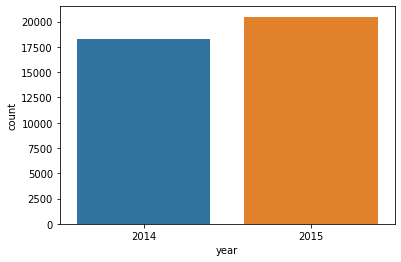

In [ ]:
sns.countplot(x = 'year', data = df)

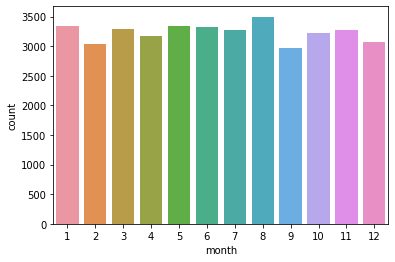

In [ ]:
sns.countplot(x = 'month', data = df)

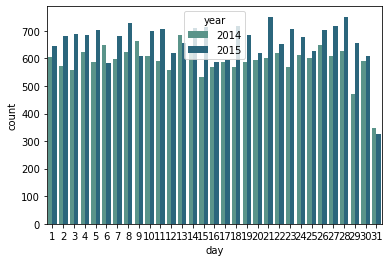

In [ ]:
sns.countplot(x = 'day', data = df, hue = 'year', palette = 'crest')

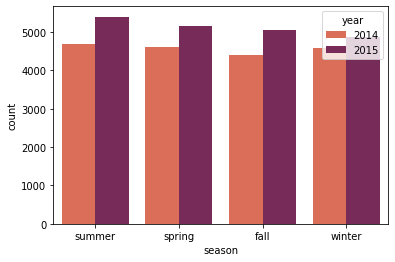

In [ ]:
sns.countplot(x = 'season', data = df, hue = 'year', palette = 'rocket_r')

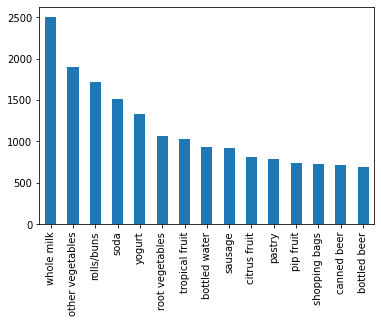

In [ ]:
df['itemDescription'].value_counts()[:15].plot(kind = 'bar')
plt.show()

## Understanding the patterns in the data

In [ ]:
df = pd.read_csv("Groceries_dataset.csv")

In [ ]:
member = df
member

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
transactions_members = [a[1]['itemDescription'].tolist() for a in list(member.groupby('Member_number'))]

In [ ]:
transactions_members

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te1 = TransactionEncoder()

In [ ]:
te_ary1 = te1.fit(transactions_members).transform(transactions_members)

In [ ]:
te1.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [ ]:
a = te1.columns_

In [ ]:
te_ary1

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
transactions_members = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_members.describe()

In [ ]:
transactions_members

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.sort_values('support', ascending= False).head(10)

,support,itemsets
149,0.181963,(whole milk)
109,0.154946,(rolls/buns)
91,0.151768,(other vegetables)
124,0.138657,(soda)
150,0.111641,(yogurt)
9,0.098133,(bottled water)
119,0.084227,(shopping bags)
110,0.083830,(root vegetables)
94,0.079857,(pastry)
145,0.069527,(whipped/sour cream)


In [ ]:
freq_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217551 entries, 0 to 217550
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   support   217551 non-null  float64
 1   itemsets  217551 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items_1 = (freq_items1['length'] == 1)
freq_items1[freq_items_1].sort_values('support', ascending= False).head(10)

,support,itemsets,length
161,0.458184,(whole milk),1
100,0.376603,(other vegetables),1
119,0.349666,(rolls/buns),1
135,0.313494,(soda),1
162,0.282966,(yogurt),1
153,0.233710,(tropical fruit),1
120,0.230631,(root vegetables),1
11,0.213699,(bottled water),1
127,0.206003,(sausage),1
29,0.185480,(citrus fruit),1


In [ ]:
freq_items_2 = (freq_items1['length'] == 2)
freq_items1[freq_items_2].sort_values('support', ascending= False).head(10)

,support,itemsets,length
5177,0.191380,"(whole milk, other vegetables)",2
5632,0.178553,"(rolls/buns, whole milk)",2
5884,0.151103,"(whole milk, soda)",2
6034,0.150590,"(yogurt, whole milk)",2
5138,0.146742,"(rolls/buns, other vegetables)",2
5153,0.124166,"(other vegetables, soda)",2
5178,0.120318,"(yogurt, other vegetables)",2
5608,0.119805,"(rolls/buns, soda)",2
6004,0.116470,"(tropical fruit, whole milk)",2
5671,0.113135,"(root vegetables, whole milk)",2


In [ ]:
freq_items_3 = (freq_items1['length'] == 3)
freq_items1[freq_items_3].sort_values('support', ascending= False).head(10)

,support,itemsets,length
44799,0.082093,"(rolls/buns, whole milk, other vegetables)",3
45097,0.071832,"(yogurt, whole milk, other vegetables)",3
44982,0.069266,"(whole milk, other vegetables, soda)",3
46983,0.065931,"(yogurt, rolls/buns, whole milk)",3
46887,0.065162,"(rolls/buns, whole milk, soda)",3
16285,0.056183,"(whole milk, other vegetables, bottled water)",3
47790,0.054387,"(yogurt, whole milk, soda)",3
44776,0.052591,"(rolls/buns, other vegetables, soda)",3
44800,0.052335,"(yogurt, rolls/buns, other vegetables)",3
45071,0.050539,"(tropical fruit, whole milk, other vegetables)",3


In [ ]:
freq_items_4 = (freq_items1['length'] == 4)
freq_items1[freq_items_4].sort_values('support', ascending= False).head(10)

,support,itemsets,length
131618,0.034377,"(yogurt, rolls/buns, whole milk, other vegetables)",4
131545,0.031811,"(rolls/buns, whole milk, other vegetables, soda)",4
132100,0.027963,"(yogurt, whole milk, other vegetables, soda)",4
131491,0.026167,"(sausage, rolls/buns, whole milk, other vegetables)",4
134757,0.024628,"(yogurt, rolls/buns, whole milk, soda)",4
131920,0.023089,"(yogurt, whole milk, sausage, other vegetables)",4
76015,0.023089,"(rolls/buns, whole milk, other vegetables, bottled water)",4
134604,0.022832,"(sausage, yogurt, rolls/buns, whole milk)",4
76160,0.022063,"(yogurt, whole milk, other vegetables, bottled water)",4
76107,0.022063,"(other vegetables, whole milk, bottled water, soda)",4


In [ ]:
freq_items_5 = (freq_items1['length'] == 5)
freq_items1[freq_items_5].sort_values('support', ascending= False).head(10)

,support,itemsets,length
196349,0.013597,"(soda, yogurt, rolls/buns, other vegetables, whole milk)",5
196269,0.013597,"(yogurt, rolls/buns, sausage, other vegetables, whole milk)",5
159579,0.010518,"(yogurt, rolls/buns, other vegetables, bottled water, whole milk)",5
196308,0.010005,"(shopping bags, yogurt, rolls/buns, other vegetables, whole milk)",5
196242,0.009749,"(soda, rolls/buns, sausage, other vegetables, whole milk)",5
196290,0.009749,"(soda, shopping bags, rolls/buns, other vegetables, whole milk)",5
196378,0.009749,"(tropical fruit, yogurt, rolls/buns, other vegetables, whole milk)",5
198090,0.009492,"(soda, yogurt, rolls/buns, sausage, whole milk)",5
159552,0.009492,"(soda, rolls/buns, other vegetables, bottled water, whole milk)",5
196515,0.009236,"(soda, yogurt, root vegetables, other vegetables, whole milk)",5


In [ ]:
freq_items_6 = (freq_items1['length'] == 6)
freq_items1[freq_items_6].sort_values('support', ascending= False).head(10)

,support,itemsets,length
215182,0.005387,"(soda, yogurt, rolls/buns, sausage, other vegetables, whole milk)",6
209815,0.004105,"(tropical fruit, canned beer, yogurt, rolls/buns, other vegetables, whole milk)",6
215207,0.004105,"(soda, shopping bags, yogurt, rolls/buns, other vegetables, whole milk)",6
214792,0.004105,"(yogurt, pastry, sausage, other vegetables, rolls/buns, whole milk)",6
208523,0.004105,"(soda, butter, yogurt, rolls/buns, other vegetables, whole milk)",6
215146,0.003848,"(soda, yogurt, rolls/buns, root vegetables, other vegetables, whole milk)",6
215189,0.003848,"(tropical fruit, yogurt, rolls/buns, sausage, other vegetables, whole milk)",6
206171,0.003848,"(soda, yogurt, rolls/buns, other vegetables, bottled water, whole milk)",6
215131,0.003848,"(yogurt, rolls/buns, sausage, other vegetables, root vegetables, whole milk)",6
206132,0.003848,"(soda, rolls/buns, sausage, other vegetables, bottled water, whole milk)",6


In [ ]:
freq_items_7 = (freq_items1['length'] == 7)
freq_items1[freq_items_7].sort_values('support', ascending= False).head(10)

,support,itemsets,length
216638,0.002565,"(soda, rolls/buns, sausage, other vegetables, bottled water, root vegetables, whole milk)",7
216654,0.002309,"(soda, yogurt, rolls/buns, sausage, other vegetables, bottled water, whole milk)",7
216659,0.002052,"(soda, yogurt, root vegetables, sausage, other vegetables, bottled water, whole milk)",7
217386,0.002052,"(yogurt, pastry, sausage, other vegetables, rolls/buns, root vegetables, whole milk)",7
216698,0.002052,"(soda, yogurt, rolls/buns, sausage, root vegetables, bottled water, whole milk)",7
216643,0.001796,"(yogurt, rolls/buns, sausage, other vegetables, bottled water, root vegetables, whole milk)",7
215685,0.001796,"(soda, UHT-milk, yogurt, rolls/buns, sausage, other vegetables, whole milk)",7
216622,0.001796,"(pip fruit, soda, yogurt, root vegetables, other vegetables, bottled water, whole milk)",7
216653,0.001796,"(soda, yogurt, rolls/buns, sausage, other vegetables, bottled water, white bread)",7
217245,0.001796,"(domestic eggs, yogurt, pastry, sausage, other vegetables, rolls/buns, whole milk)",7


In [ ]:
freq_items_8 = (freq_items1['length'] == 8)
freq_items1[freq_items_8].sort_values('support', ascending= False).head(10)

,support,itemsets,length
217528,0.001539,"(soda, yogurt, rolls/buns, sausage, other vegetables, bottled water, root vegetables, whole milk)",8
217494,0.001283,"(pip fruit, soda, pork, yogurt, berries, other vegetables, bottled water, whole milk)",8
217546,0.001283,"(domestic eggs, yogurt, pastry, sausage, other vegetables, rolls/buns, root vegetables, whole milk)",8
217529,0.001283,"(soda, yogurt, rolls/buns, sausage, other vegetables, bottled water, white bread, whole milk)",8
217479,0.001026,"(soda, UHT-milk, yogurt, rolls/buns, sausage, other vegetables, bottled water, white bread)",8
217525,0.001026,"(pip fruit, soda, pork, yogurt, root vegetables, other vegetables, bottled water, whole milk)",8
217531,0.001026,"(soda, specialty chocolate, shopping bags, brown bread, yogurt, citrus fruit, other vegetables, whole milk)",8
217530,0.001026,"(soda, pork, yogurt, rolls/buns, sausage, root vegetables, bottled water, whole milk)",8
217527,0.001026,"(soda, pork, yogurt, rolls/buns, sausage, other vegetables, bottled water, whole milk)",8
217526,0.001026,"(pip fruit, soda, yogurt, root vegetables, sausage, other vegetables, bottled water, whole milk)",8


In [ ]:
rules1 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(UHT-milk),0.015393,0.078502,0.001026,0.066667,0.849237,-0.000182,0.987320
1,(UHT-milk),(Instant food products),0.078502,0.015393,0.001026,0.013072,0.849237,-0.000182,0.997649
2,(Instant food products),(beef),0.015393,0.119548,0.002309,0.150000,1.254721,0.000469,1.035825
3,(beef),(Instant food products),0.119548,0.015393,0.002309,0.019313,1.254721,0.000469,1.003998
4,(Instant food products),(beverages),0.015393,0.062083,0.001026,0.066667,1.073829,0.000071,1.004911
5,(beverages),(Instant food products),0.062083,0.015393,0.001026,0.016529,1.073829,0.000071,1.001156
6,(Instant food products),(bottled beer),0.015393,0.158799,0.002822,0.183333,1.154496,0.000378,1.030042
7,(bottled beer),(Instant food products),0.158799,0.015393,0.002822,0.017771,1.154496,0.000378,1.002421
8,(Instant food products),(bottled water),0.015393,0.213699,0.002822,0.183333,0.857903,-0.000467,0.962817
9,(bottled water),(Instant food products),0.213699,0.015393,0.002822,0.013205,0.857903,-0.000467,0.997784


In [ ]:
top_support = rules1.sort_values('support', ascending= False)
top_support.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10026,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
10027,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
10936,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
10937,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
11441,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
11440,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310
11741,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076
11740,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
9948,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197
9949,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502


In [ ]:
top_confidence = rules1.sort_values('confidence', ascending= False)
top_confidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3955298,"(soda, pork, brown bread, whipped/sour cream, yogurt)",(whole milk),0.001283,0.458184,0.001283,1.0,2.182531,0.000695,inf
2104674,"(curd, rolls/buns, processed cheese, bottled water)",(frankfurter),0.001026,0.137506,0.001026,1.0,7.272388,0.000885,inf
2440160,"(pork, root vegetables, sausage, butter)",(whole milk),0.001283,0.458184,0.001283,1.0,2.182531,0.000695,inf
2902701,"(curd, sausage, specialty chocolate, ham)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
1574812,"(chocolate, beef, bottled water, white bread)",(other vegetables),0.001026,0.376603,0.001026,1.0,2.655313,0.000640,inf
4140308,"(frankfurter, soda, salty snack, citrus fruit, whole milk)",(yogurt),0.001026,0.282966,0.001026,1.0,3.533998,0.000736,inf
3355851,"(yogurt, rolls/buns, soda, pot plants)",(whole milk),0.001283,0.458184,0.001283,1.0,2.182531,0.000695,inf
2162570,"(waffles, sausage, bottled water, grapes)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
4414098,"(shopping bags, whipped/sour cream, root vegetables, other vegetables, white bread)",(whole milk),0.001283,0.458184,0.001283,1.0,2.182531,0.000695,inf
4438290,"(UHT-milk, bottled beer, rolls/buns, chocolate, whole milk)","(sausage, other vegetables)",0.001026,0.092868,0.001026,1.0,10.767956,0.000931,inf


In [ ]:
top_lift = rules1.sort_values('lift', ascending= False)
top_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4626974,"(coffee, pork, meat)","(domestic eggs, root vegetables, long life bakery product, whole milk)",0.002052,0.001539,0.001026,0.500000,324.833333,0.001023,1.996921
4626951,"(domestic eggs, root vegetables, long life bakery product, whole milk)","(coffee, pork, meat)",0.001539,0.002052,0.001026,0.666667,324.833333,0.001023,2.993843
4626949,"(domestic eggs, long life bakery product, pork, whole milk)","(coffee, root vegetables, meat)",0.001539,0.002565,0.001026,0.666667,259.866667,0.001022,2.992304
4626976,"(coffee, root vegetables, meat)","(domestic eggs, long life bakery product, pork, whole milk)",0.002565,0.001539,0.001026,0.400000,259.866667,0.001022,1.664101
4626947,"(coffee, root vegetables, whole milk, meat)","(domestic eggs, long life bakery product, pork)",0.001796,0.002565,0.001026,0.571429,222.742857,0.001022,2.327347
4626978,"(domestic eggs, long life bakery product, pork)","(coffee, root vegetables, whole milk, meat)",0.002565,0.001796,0.001026,0.400000,222.742857,0.001022,1.663674
4626941,"(coffee, root vegetables, domestic eggs, whole milk)","(pork, long life bakery product, meat)",0.003335,0.001539,0.001026,0.307692,199.897436,0.001021,1.442221
4626984,"(pork, long life bakery product, meat)","(coffee, root vegetables, domestic eggs, whole milk)",0.001539,0.003335,0.001026,0.666667,199.897436,0.001021,2.989995
4676328,"(pip fruit, pork, rolls/buns, bottled water)","(whole milk, chocolate, other vegetables, white bread)",0.003079,0.001796,0.001026,0.333333,185.619048,0.001021,1.497306
4454838,"(whole milk, rolls/buns, long life bakery product, whipped/sour cream)","(beef, domestic eggs, meat)",0.003592,0.001539,0.001026,0.285714,185.619048,0.001021,1.397845


# New Section

In [ ]:
grocery = pd.read_csv("/content/drive/MyDrive/Groceries_dataset.csv")

In [ ]:
#d=grocery.set_index(['Date'])
# grocery['Date'] = pd.to_datetime(grocery['Date'])
# grocery

grocery['Date'] = pd.to_datetime(grocery['Date'])

In [ ]:
grocery.sort_values('Date', ascending = True)

,Member_number,Date,itemDescription
15338,1381,2014-01-01,curd
9172,2226,2014-01-01,sausage
31684,1659,2014-01-01,frozen vegetables
13247,2610,2014-01-01,hamburger meat
13242,3942,2014-01-01,other vegetables
...,...,...,...
20822,3579,2015-12-30,herbs
19048,3562,2015-12-30,ice cream
34960,3562,2015-12-30,rolls/buns
17955,1963,2015-12-30,citrus fruit


## Last six months from 1st July 2015

In [ ]:
df1 = grocery['Date'] > '2015-7-1'

In [ ]:
last_six = grocery.loc[df1].sort_values('Date', ascending = True)

In [ ]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(last_six.groupby('Member_number'))]

In [ ]:
te1 = TransactionEncoder()

In [ ]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [ ]:
a = te1.columns_

In [ ]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [ ]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [ ]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.005644,(abrasive cleaner)
3,0.007440,(artif. sweetener)
4,0.001026,(bags)
5,0.031042,(baking powder)
6,0.004361,(bathroom cleaner)


In [ ]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items1.head()

,support,itemsets,length
0,0.015393,(Instant food products),1
1,0.078502,(UHT-milk),1
2,0.005644,(abrasive cleaner),1
3,0.007440,(artif. sweetener),1
4,0.001026,(bags),1


In [ ]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(Instant food products),0.078502,0.015393,0.001026,0.013072,0.849237,-0.000182,0.997649
1,(Instant food products),(UHT-milk),0.015393,0.078502,0.001026,0.066667,0.849237,-0.000182,0.987320
2,(Instant food products),(beef),0.015393,0.119548,0.002309,0.150000,1.254721,0.000469,1.035825
3,(beef),(Instant food products),0.119548,0.015393,0.002309,0.019313,1.254721,0.000469,1.003998
4,(beverages),(Instant food products),0.062083,0.015393,0.001026,0.016529,1.073829,0.000071,1.001156
5,(Instant food products),(beverages),0.015393,0.062083,0.001026,0.066667,1.073829,0.000071,1.004911
6,(bottled beer),(Instant food products),0.158799,0.015393,0.002822,0.017771,1.154496,0.000378,1.002421
7,(Instant food products),(bottled beer),0.015393,0.158799,0.002822,0.183333,1.154496,0.000378,1.030042
8,(Instant food products),(bottled water),0.015393,0.213699,0.002822,0.183333,0.857903,-0.000467,0.962817
9,(bottled water),(Instant food products),0.213699,0.015393,0.002822,0.013205,0.857903,-0.000467,0.997784


In [ ]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10026,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
10027,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
10936,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
10937,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
11441,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310
11440,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
11741,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
11740,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076
9948,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502
9949,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197


In [ ]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1574483,"(chocolate, frankfurter, bottled water, beef)",(root vegetables),0.001026,0.230631,0.001026,1.0,4.335929,0.000790,inf
2417334,"(butter, margarine, yogurt, whipped/sour cream)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
3384278,"(whole milk, UHT-milk, domestic eggs, tropical fruit, citrus fruit)",(other vegetables),0.001026,0.376603,0.001026,1.0,2.655313,0.000640,inf
3148254,"(shopping bags, ham, sausage, pastry)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
2417368,"(whole milk, butter, mayonnaise)","(other vegetables, rolls/buns)",0.001026,0.146742,0.001026,1.0,6.814685,0.000876,inf
4468527,"(pip fruit, pork, yogurt, soda, berries)","(other vegetables, bottled water)",0.001283,0.093894,0.001283,1.0,10.650273,0.001162,inf
2417363,"(whole milk, butter, other vegetables, mayonnaise)",(rolls/buns),0.001026,0.349666,0.001026,1.0,2.859868,0.000667,inf
2417360,"(whole milk, butter, rolls/buns, mayonnaise)",(other vegetables),0.001026,0.376603,0.001026,1.0,2.655313,0.000640,inf
4468524,"(pork, yogurt, soda, other vegetables, bottled water, berries)",(pip fruit),0.001283,0.170600,0.001283,1.0,5.861654,0.001064,inf
3148223,"(shopping bags, ham, sausage, pastry)",(tropical fruit),0.001026,0.233710,0.001026,1.0,4.278814,0.000786,inf


In [ ]:
top_lift2 = rules2.sort_values('lift', ascending= False)
top_lift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4626942,"(whole milk, root vegetables, long life bakery product, domestic eggs)","(meat, coffee, pork)",0.001539,0.002052,0.001026,0.666667,324.833333,0.001023,2.993843
4626983,"(meat, coffee, pork)","(whole milk, root vegetables, long life bakery product, domestic eggs)",0.002052,0.001539,0.001026,0.500000,324.833333,0.001023,1.996921
4626931,"(whole milk, long life bakery product, pork, domestic eggs)","(meat, root vegetables, coffee)",0.001539,0.002565,0.001026,0.666667,259.866667,0.001022,2.992304
4626994,"(meat, root vegetables, coffee)","(whole milk, long life bakery product, pork, domestic eggs)",0.002565,0.001539,0.001026,0.400000,259.866667,0.001022,1.664101
4626944,"(whole milk, meat, coffee, root vegetables)","(long life bakery product, pork, domestic eggs)",0.001796,0.002565,0.001026,0.571429,222.742857,0.001022,2.327347
4626981,"(long life bakery product, pork, domestic eggs)","(whole milk, meat, coffee, root vegetables)",0.002565,0.001796,0.001026,0.400000,222.742857,0.001022,1.663674
4626941,"(whole milk, root vegetables, coffee, domestic eggs)","(meat, long life bakery product, pork)",0.003335,0.001539,0.001026,0.307692,199.897436,0.001021,1.442221
4626984,"(meat, long life bakery product, pork)","(whole milk, root vegetables, coffee, domestic eggs)",0.001539,0.003335,0.001026,0.666667,199.897436,0.001021,2.989995
4676333,"(white bread, other vegetables, whole milk, chocolate)","(pip fruit, pork, rolls/buns, bottled water)",0.001796,0.003079,0.001026,0.571429,185.619048,0.001021,2.326150
4676388,"(pip fruit, pork, rolls/buns, bottled water)","(white bread, other vegetables, whole milk, chocolate)",0.003079,0.001796,0.001026,0.333333,185.619048,0.001021,1.497306


## Half Yearly Sales between 1st January 2015 and 30th June 2015

In [ ]:
df1 = (grocery['Date'] > '2015-1-1') & (grocery['Date'] < '2015-6-30')

In [ ]:
last_six = grocery.loc[df1].sort_values('Date', ascending = True)

In [ ]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(last_six.groupby('Member_number'))]

In [ ]:
te1 = TransactionEncoder()

NameError: ignored

In [ ]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [ ]:
a = te1.columns_

In [ ]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [ ]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.005644,(abrasive cleaner)
3,0.007440,(artif. sweetener)
4,0.001026,(bags)
5,0.031042,(baking powder)
6,0.004361,(bathroom cleaner)


In [ ]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items1.head()

,support,itemsets,length
0,0.015393,(Instant food products),1
1,0.078502,(UHT-milk),1
2,0.005644,(abrasive cleaner),1
3,0.007440,(artif. sweetener),1
4,0.001026,(bags),1


In [ ]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(Instant food products),0.078502,0.015393,0.001026,0.013072,0.849237,-0.000182,0.997649
1,(Instant food products),(UHT-milk),0.015393,0.078502,0.001026,0.066667,0.849237,-0.000182,0.987320
2,(Instant food products),(beef),0.015393,0.119548,0.002309,0.150000,1.254721,0.000469,1.035825
3,(beef),(Instant food products),0.119548,0.015393,0.002309,0.019313,1.254721,0.000469,1.003998
4,(beverages),(Instant food products),0.062083,0.015393,0.001026,0.016529,1.073829,0.000071,1.001156
5,(Instant food products),(beverages),0.015393,0.062083,0.001026,0.066667,1.073829,0.000071,1.004911
6,(bottled beer),(Instant food products),0.158799,0.015393,0.002822,0.017771,1.154496,0.000378,1.002421
7,(Instant food products),(bottled beer),0.015393,0.158799,0.002822,0.183333,1.154496,0.000378,1.030042
8,(Instant food products),(bottled water),0.015393,0.213699,0.002822,0.183333,0.857903,-0.000467,0.962817
9,(bottled water),(Instant food products),0.213699,0.015393,0.002822,0.013205,0.857903,-0.000467,0.997784


In [ ]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10026,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
10027,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
10936,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
10937,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
11441,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310
11440,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
11741,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
11740,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076
9948,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502
9949,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197


In [ ]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1574483,"(chocolate, frankfurter, bottled water, beef)",(root vegetables),0.001026,0.230631,0.001026,1.0,4.335929,0.000790,inf
2417334,"(butter, margarine, yogurt, whipped/sour cream)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
3384278,"(whole milk, UHT-milk, domestic eggs, tropical fruit, citrus fruit)",(other vegetables),0.001026,0.376603,0.001026,1.0,2.655313,0.000640,inf
3148254,"(shopping bags, ham, sausage, pastry)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
2417368,"(whole milk, butter, mayonnaise)","(other vegetables, rolls/buns)",0.001026,0.146742,0.001026,1.0,6.814685,0.000876,inf
4468527,"(pip fruit, pork, yogurt, soda, berries)","(other vegetables, bottled water)",0.001283,0.093894,0.001283,1.0,10.650273,0.001162,inf
2417363,"(whole milk, butter, other vegetables, mayonnaise)",(rolls/buns),0.001026,0.349666,0.001026,1.0,2.859868,0.000667,inf
2417360,"(whole milk, butter, rolls/buns, mayonnaise)",(other vegetables),0.001026,0.376603,0.001026,1.0,2.655313,0.000640,inf
4468524,"(pork, yogurt, soda, other vegetables, bottled water, berries)",(pip fruit),0.001283,0.170600,0.001283,1.0,5.861654,0.001064,inf
3148223,"(shopping bags, ham, sausage, pastry)",(tropical fruit),0.001026,0.233710,0.001026,1.0,4.278814,0.000786,inf


In [ ]:
top_leverage2 = rules2.sort_values('leverage', ascending= False)
top_leverage2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11741,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
11740,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076
10026,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
10027,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
10936,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
10937,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
246106,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870
246111,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727
11207,(yogurt),(sausage),0.282966,0.206003,0.075423,0.266546,1.293892,0.017132,1.082545
11206,(sausage),(yogurt),0.206003,0.282966,0.075423,0.366127,1.293892,0.017132,1.131196


## Half Yearly Sales between 1st July 2014 and 31st June 2014

In [ ]:
df1 = (grocery['Date'] > '2014-7-1') & (grocery['Date'] < '2014-12-31')

In [ ]:
last_six = grocery.loc[df1].sort_values('Date', ascending = True)

In [ ]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(last_six.groupby('Member_number'))]

In [ ]:
te1 = TransactionEncoder()

In [ ]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [ ]:
a = te1.columns_

In [ ]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [ ]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.005644,(abrasive cleaner)
3,0.007440,(artif. sweetener)
4,0.001026,(bags)
5,0.031042,(baking powder)
6,0.004361,(bathroom cleaner)


In [ ]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items1.head()

,support,itemsets,length
0,0.015393,(Instant food products),1
1,0.078502,(UHT-milk),1
2,0.005644,(abrasive cleaner),1
3,0.007440,(artif. sweetener),1
4,0.001026,(bags),1


In [ ]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

In [ ]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

In [ ]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

In [ ]:
top_leverage2 = rules2.sort_values('leverage', ascending= False)
top_leverage2.head(10)

## Half Yearly Sales between 1st January 2014 and 30th June 2014

In [ ]:
df1 = (grocery['Date'] > '2014-1-1') & (grocery['Date'] < '2014-6-30')

In [ ]:
last_six = grocery.loc[df1].sort_values('Date', ascending = True)

In [ ]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(last_six.groupby('Member_number'))]

In [ ]:
te1 = TransactionEncoder()

In [ ]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [ ]:
a = te1.columns_

In [ ]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [ ]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.007946,(Instant food products)
1,0.030195,(UHT-milk)
2,0.001986,(abrasive cleaner)
3,0.002781,(artif. sweetener)
4,0.012714,(baking powder)
5,0.033373,(beef)
6,0.025030,(berries)


In [ ]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items1.head()

,support,itemsets,length
0,0.007946,(Instant food products),1
1,0.030195,(UHT-milk),1
2,0.001986,(abrasive cleaner),1
3,0.002781,(artif. sweetener),1
4,0.012714,(baking powder),1


In [ ]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(newspapers),0.007946,0.067541,0.001192,0.150000,2.220882,0.000655,1.097011
1,(newspapers),(Instant food products),0.067541,0.007946,0.001192,0.017647,2.220882,0.000655,1.009875
2,(Instant food products),(pastry),0.007946,0.079857,0.001192,0.150000,1.878358,0.000557,1.082521
3,(pastry),(Instant food products),0.079857,0.007946,0.001192,0.014925,1.878358,0.000557,1.007085
4,(Instant food products),(root vegetables),0.007946,0.083830,0.001192,0.150000,1.789336,0.000526,1.077847
5,(root vegetables),(Instant food products),0.083830,0.007946,0.001192,0.014218,1.789336,0.000526,1.006363
6,(Instant food products),(whole milk),0.007946,0.181963,0.001589,0.200000,1.099127,0.000143,1.022547
7,(whole milk),(Instant food products),0.181963,0.007946,0.001589,0.008734,1.099127,0.000143,1.000795
8,(UHT-milk),(bottled beer),0.030195,0.063965,0.001192,0.039474,0.617113,-0.000740,0.974502
9,(bottled beer),(UHT-milk),0.063965,0.030195,0.001192,0.018634,0.617113,-0.000740,0.988219


In [ ]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2870,(rolls/buns),(whole milk),0.154946,0.181963,0.027811,0.179487,0.986396,-0.000384,0.996983
2871,(whole milk),(rolls/buns),0.181963,0.154946,0.027811,0.152838,0.986396,-0.000384,0.997512
3036,(soda),(whole milk),0.138657,0.181963,0.027811,0.200573,1.102276,0.002580,1.023280
3037,(whole milk),(soda),0.181963,0.138657,0.027811,0.152838,1.102276,0.002580,1.016740
2583,(whole milk),(other vegetables),0.181963,0.151768,0.023441,0.128821,0.848802,-0.004176,0.973660
2582,(other vegetables),(whole milk),0.151768,0.181963,0.023441,0.154450,0.848802,-0.004176,0.967462
2553,(other vegetables),(soda),0.151768,0.138657,0.022249,0.146597,1.057262,0.001205,1.009304
2552,(soda),(other vegetables),0.138657,0.151768,0.022249,0.160458,1.057262,0.001205,1.010351
2537,(other vegetables),(rolls/buns),0.151768,0.154946,0.021454,0.141361,0.912324,-0.002062,0.984178
2536,(rolls/buns),(other vegetables),0.154946,0.151768,0.021454,0.138462,0.912324,-0.002062,0.984555


In [ ]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8200,"(soda, domestic eggs, fruit/vegetable juice)",(whole milk),0.001192,0.181963,0.001192,1.0,5.495633,0.000975,inf
8130,"(soda, white bread, yogurt)",(bottled water),0.001192,0.098133,0.001192,1.0,10.190283,0.001075,inf
8313,"(newspapers, napkins, whole milk)",(rolls/buns),0.001192,0.154946,0.001192,1.0,6.453846,0.001007,inf
6396,"(rolls/buns, liquor)",(other vegetables),0.001589,0.151768,0.001589,1.0,6.589005,0.001348,inf
8368,"(soda, rolls/buns, white bread)",(other vegetables),0.001589,0.151768,0.001589,1.0,6.589005,0.001348,inf
3163,"(UHT-milk, brown bread)",(shopping bags),0.001192,0.084227,0.001192,1.0,11.872642,0.001092,inf
5946,"(long life bakery product, flour)",(whole milk),0.001192,0.181963,0.001192,1.0,5.495633,0.000975,inf
8133,"(white bread, yogurt, bottled water)",(soda),0.001192,0.138657,0.001192,1.0,7.212034,0.001027,inf
7268,"(white bread, pickled vegetables)",(rolls/buns),0.001192,0.154946,0.001192,1.0,6.453846,0.001007,inf
7230,"(specialty chocolate, pastry)",(whole milk),0.001589,0.181963,0.001589,1.0,5.495633,0.001300,inf


In [ ]:
top_leverage2 = rules2.sort_values('leverage', ascending= False)
top_leverage2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2889,(root vegetables),(soda),0.083830,0.138657,0.017481,0.208531,1.503931,0.005858,1.088284
2888,(soda),(root vegetables),0.138657,0.083830,0.017481,0.126074,1.503931,0.005858,1.048339
2999,(yogurt),(shopping bags),0.111641,0.084227,0.014700,0.131673,1.563302,0.005297,1.054640
2998,(shopping bags),(yogurt),0.084227,0.111641,0.014700,0.174528,1.563302,0.005297,1.076184
1923,(fruit/vegetable juice),(rolls/buns),0.059992,0.154946,0.013111,0.218543,1.410443,0.003815,1.081382
1922,(rolls/buns),(fruit/vegetable juice),0.154946,0.059992,0.013111,0.084615,1.410443,0.003815,1.026899
371,(bottled beer),(whipped/sour cream),0.063965,0.069527,0.007946,0.124224,1.786690,0.003499,1.062455
370,(whipped/sour cream),(bottled beer),0.069527,0.063965,0.007946,0.114286,1.786690,0.003499,1.056814
3032,(soda),(white bread),0.138657,0.038538,0.008741,0.063037,1.635719,0.003397,1.026148
3033,(white bread),(soda),0.038538,0.138657,0.008741,0.226804,1.635719,0.003397,1.114003
